In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
from astropy.table import Table
import scipy
import pyccl as ccl
import astropy.units as u
from scipy import interpolate
from astropy.coordinates import SkyCoord
from clmm.dataops import _compute_lensing_angles_flatsky
from clmm import Cosmology
import clmm
from clmm.dataops import _compute_lensing_angles_flatsky
sys.path.append('../modules/')
import clmm
import shear_multipole_modeling as mlt
#import shear_multipole_modeling as model
import shear_multipole_from_data
import lensing_simulation_tools
import clmm

In [2]:
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)
cosmo_ccl  = ccl.Cosmology(Omega_c=0.27 - 0.045, Omega_b=0.045, h=0.71, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
moo = clmm.Modeling(massdef = 'critical', delta_mdef = 200, halo_profile_model = 'einasto')
moo.set_concentration(4)
moo.set_mass(1e15)

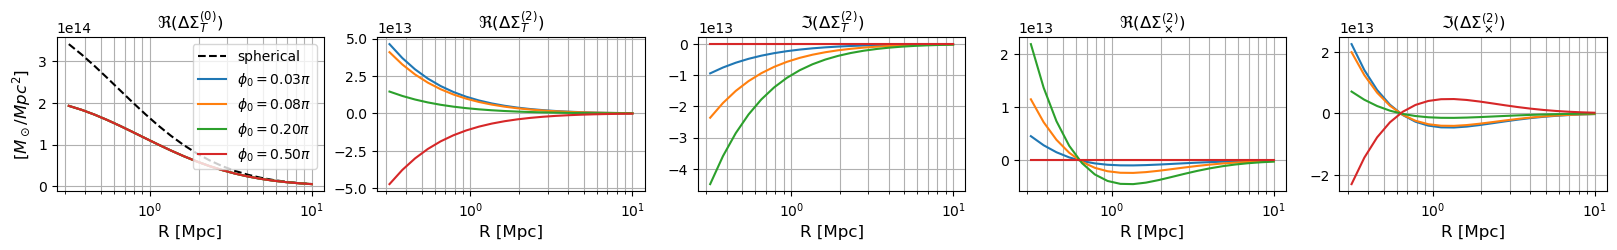

In [ ]:
qxy=.8
Rs =np.logspace(-0.5, 1,20)
sd_f = mlt.surface_density_spherical(.5, 15., 4, moo, convergence=False)
m_list = [0,2,4]
signal = ['sheart_Re_0','sheart_Re_2','sheart_Im_2','shearx_Re_2','shearx_Im_2']
label = [r'$\Re(\Delta\Sigma_T^{(0)})$',r'$\Re(\Delta\Sigma_T^{(2)})$',r'$\Im(\Delta\Sigma_T^{(2)})$',r'$\Re(\Delta\Sigma_\times^{(2)})$',r'$\Im(\Delta\Sigma_\times^{(2)})$']
fig, ax = plt.subplots(1,len(signal), figsize=(20, 2),  )
ax[0].plot(Rs, moo.eval_excess_surface_density(Rs, .5), '--k', label = 'spherical')
for i, sig in enumerate(signal):
    ax[i].grid(which='both')
    for j, phi0_ in enumerate([0.1, np.pi/12, np.pi/5, np.pi/2]):
        sd_multipoles = mlt.surface_density_multipoles(sd_f, qxy**(-2), qxy, phi0_, m_list=m_list,)
        esd_multipoles = mlt.excess_surface_density_multipoles(Rs, sd_multipoles, m_list=m_list)
        ax[i].plot(Rs, np.array(esd_multipoles[sig]), label = f'$\phi_0 = {phi0_/np.pi:.2f}\pi$')
        ax[i].set_xscale('log')
        ax[i].set_title(label[i])
        ax[i].set_xlabel('R [Mpc]', fontsize=12)
        ax[0].set_ylabel(r'$[M_\odot/Mpc^2]$', fontsize=12)
        ax[0].legend()